In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_raw = pd.read_csv('../input/city_lab.csv')

In [4]:
df_raw.head()

,調査年 コード,調査年,地域 コード,地域,/項目,C120110_課税対象所得【千円】,C120120_納税義務者数（所得割）【人】,F2201_第1次産業就業者数【人】,F2211_第2次産業就業者数【人】,F2221_第3次産業就業者数【人】
0,2015100000,2015年度,1100,北海道 札幌市,NaN,2535322425,834364,3790,118503,645868
1,2015100000,2015年度,1202,北海道 函館市,NaN,295671670,108641,4137,19490,86480
2,2015100000,2015年度,1203,北海道 小樽市,NaN,119533070,48037,710,8909,39508
3,2015100000,2015年度,1204,北海道 旭川市,NaN,380049303,139822,4069,26028,116152
4,2015100000,2015年度,1205,北海道 室蘭市,NaN,102184822,36100,351,9384,26169


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741 entries, 0 to 1740
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   調査年 コード                 1741 non-null   int64  
 1   調査年                     1741 non-null   object 
 2   地域 コード                  1741 non-null   int64  
 3   地域                      1741 non-null   object 
 4   /項目                     0 non-null      float64
 5   C120110_課税対象所得【千円】      1741 non-null   int64  
 6   C120120_納税義務者数（所得割）【人】  1741 non-null   int64  
 7   F2201_第1次産業就業者数【人】      1741 non-null   int64  
 8   F2211_第2次産業就業者数【人】      1741 non-null   int64  
 9   F2221_第3次産業就業者数【人】      1741 non-null   int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 136.1+ KB


In [6]:
df_raw.columns = ['year', 'year_letter', 'city_code', 'city', 'item', 'income', 
                  'num_of', 'num_of_prmari', 'num_of_second', 'num_of_third']

In [8]:
df_raw.drop(['year_letter','item'],axis=1, inplace=True)

In [9]:
df_raw.head()

,year,city_code,city,income,num_of,num_of_prmari,num_of_second,num_of_third
0,2015100000,1100,北海道 札幌市,2535322425,834364,3790,118503,645868
1,2015100000,1202,北海道 函館市,295671670,108641,4137,19490,86480
2,2015100000,1203,北海道 小樽市,119533070,48037,710,8909,39508
3,2015100000,1204,北海道 旭川市,380049303,139822,4069,26028,116152
4,2015100000,1205,北海道 室蘭市,102184822,36100,351,9384,26169


In [10]:
df_raw['a_man'] = df_raw['income']/ df_raw['num_of']

In [11]:
df_raw['sum'] = df_raw['num_of_prmari'] + df_raw['num_of_second'] + df_raw['num_of_third']

In [12]:
df_raw.head(100)

,year,city_code,city,income,num_of,num_of_prmari,num_of_second,num_of_third,a_man,sum
0,2015100000,1100,北海道 札幌市,2535322425,834364,3790,118503,645868,3038.628734,768161
1,2015100000,1202,北海道 函館市,295671670,108641,4137,19490,86480,2721.547758,110107
2,2015100000,1203,北海道 小樽市,119533070,48037,710,8909,39508,2488.354185,49127
3,2015100000,1204,北海道 旭川市,380049303,139822,4069,26028,116152,2718.093741,146249
4,2015100000,1205,北海道 室蘭市,102184822,36100,351,9384,26169,2830.604488,35904
...,...,...,...,...,...,...,...,...,...,...
95,2015100000,1461,北海道 中富良野町,5174372,1868,972,235,1285,2770.006424,2492
96,2015100000,1462,北海道 南富良野町,2659667,957,257,189,821,2779.171369,1267
97,2015100000,1463,北海道 占冠村,1459919,564,66,69,607,2588.508865,742
98,2015100000,1464,北海道 和寒町,3010638,1171,618,240,892,2570.997438,1750


In [14]:
df_raw['parcent_of_pri'] = df_raw['num_of_prmari']/ df_raw['sum']

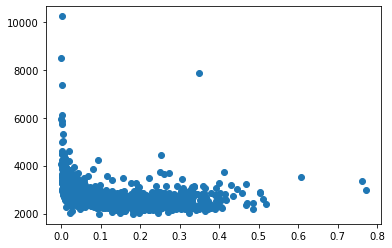

In [15]:
plt.scatter(df_raw['parcent_of_pri'], df_raw['a_man'])